## 1.3: Datasets


In [2]:
import numpy as np
import prtools as pr
import matplotlib.pyplot as plt

### Hardcoded dataset

In [2]:
# Below a fake dataset containin 10 objects and 3 features i.a. a 10 x 3 matrix
x = np.array([[0.7, 0.3, 0.2], [2.1, 4.5, 0], [1.9, 1.8, 0.5], [3.1, 2.5, 0.5], [2.5, 2.8, 0.8], [2.8, 0.5, 1.5], [3.2, 1.9, 1.5], [3.9, 0.5, 1.8], [4.5, 2.5, 2.5], [4.2, 4.5, 2.5]])

# Compute mean and std
mean = np.mean(x, axis=0)  # axis=0 means that we compute the mean for each column
mean_2 = np.mean(x, axis=1)  # axis=1 means that we compute the mean for each row
std = np.std(x, axis=0)

print('Mean over cols (all objects): ', mean)
print('Mean over rows...: ', mean_2)
print('Std: ', std)

Mean over cols (all objects):  [2.89 2.18 1.18]
Mean over rows...:  [0.4        2.2        1.4        2.03333333 2.03333333 1.6
 2.2        2.06666667 3.16666667 3.73333333]
Std:  [1.09676798 1.44069428 0.86579443]


### Scatterplots

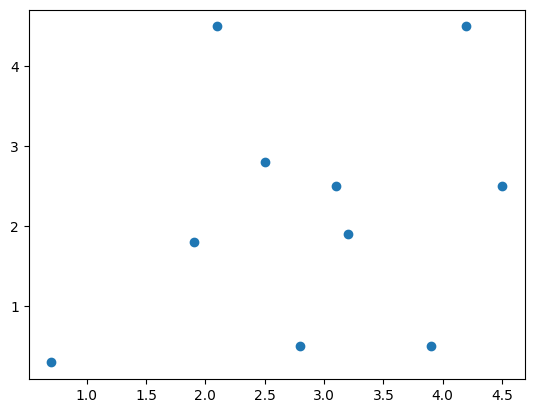

In [3]:
# Below we turn the 3D dataset into a 2D dataset by removing the third feature
plt.scatter(x[:, 0], x[:, 1])

### Adding labels to dataset

In [4]:
# We assume numeric labels
lab = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2]).reshape(10, 1)  # transpose to get a column vector
print('Labels: \n', lab)

a = pr.prdataset(x, lab)
print('Dataset without labels: \n', a.data)
print('Dataset with labels: \n', a)

Labels: 
 [[1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]]
Dataset without labels: 
 [[0.7 0.3 0.2]
 [2.1 4.5 0. ]
 [1.9 1.8 0.5]
 [3.1 2.5 0.5]
 [2.5 2.8 0.8]
 [2.8 0.5 1.5]
 [3.2 1.9 1.5]
 [3.9 0.5 1.8]
 [4.5 2.5 2.5]
 [4.2 4.5 2.5]]
Dataset with labels: 
 10 by 3 prdataset with 2 classes: [5 5]


### Boomerangs and Bananas dataset

Boomerangs dataset: 
 Boomerangs 100 by 3 prdataset with 2 classes: [51 49]
Bananas dataset: 
 Banana dataset 50 by 2 prdataset with 2 classes: [24 26]
Bananas data:  [[  4.31760037   1.64139362]
 [ -2.07984663  -3.69956672]
 [  3.98454568   4.03072107]
 [  1.27057561  -5.36314114]
 [  5.17845337  -2.11235436]
 [  0.03005661  -4.83632209]
 [  2.07728191  -1.83520817]
 [  4.5122531   -2.8536472 ]
 [ -4.69921872  -3.25459623]
 [  6.09181036   0.09439624]
 [  2.34133993  -3.8581126 ]
 [ -6.14576302  -2.83437983]
 [  2.80667061   3.53687453]
 [  5.8755312    0.04492601]
 [  4.05361899   2.59986309]
 [ -3.32429467  -3.31660566]
 [  1.58344088   4.86936214]
 [  5.37463643  -2.48186888]
 [ -0.47157332  -3.46165893]
 [  3.96701737  -2.8529666 ]
 [ -0.85232573  -5.14965179]
 [ -2.33263831  -6.41407999]
 [ -2.08205651  -5.24676878]
 [ -2.38495819  -3.31055518]
 [ -9.53486286  -6.17139485]
 [ -5.66270378   0.75868632]
 [ -9.52630173  -2.98576024]
 [ -6.31278758   1.16834635]
 [ -7.19720311  -1.08

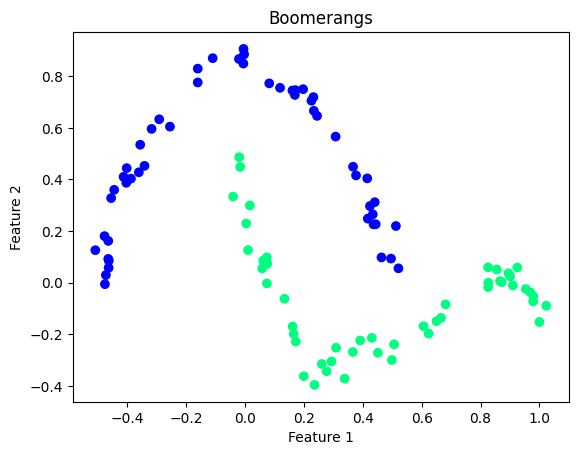

In [5]:
# Load the dataset boomerangs uisng the PR function "boomerangs" and choose the no. of objects to generate
b = pr.boomerangs(100)
print('Boomerangs dataset: \n', b)

# Scatterplot of features 0 and 1
# pr.scatterd(b)

# Scatterplot of features 1 and 2
pr.scatterd(b[:, [1, 2]])

# Extract the original data matrix from a prdataset using + operator
bananas = pr.gendatb(50)
print('Bananas dataset: \n', bananas)

bananas_ds_no_labels = pr.prdataset(+bananas)
print('Bananas data: ', +bananas)
print('New pr bananas dataset without labels: \n', bananas_ds_no_labels)

## 1.4: Creating Mappings and Decision Boundaries

### Instantiating Classifiers

Error/classification rate:  0.17


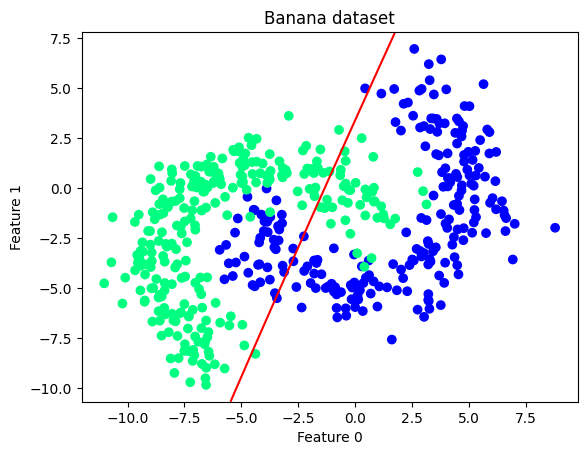

In [30]:
bananas_data = pr.gendatb(500)
quad_classifier = pr.qdc(bananas_data)  # directly trained on the dataset

# nm_classifier = pr.nmc()  # NOTE: create an untrained classifier
# nm_classifier.train(bananas_data)

classification = quad_classifier.eval(bananas_data)  # evaluate the classifier on the dataset
# print('Labels: \n', pr.labeld(classification)) # extract the labels
# TODO: is this the error rate??
print('Error/classification rate: ', pr.testc(classification)) # classification rate

# # We can also pass hyperparams
# svc_classifier = pr.svc(bananas_data, ('rbf', 4.5, 1)) # kernel, kernel parameter, regularization parameter

# Plot the decision boundary
pr.scatterd(bananas_data)
pr.plotc(quad_classifier, levels=[0], colors='r', gridsize=100)

### Visualizing Decision Boundaries

Classification/error rate:  0.18


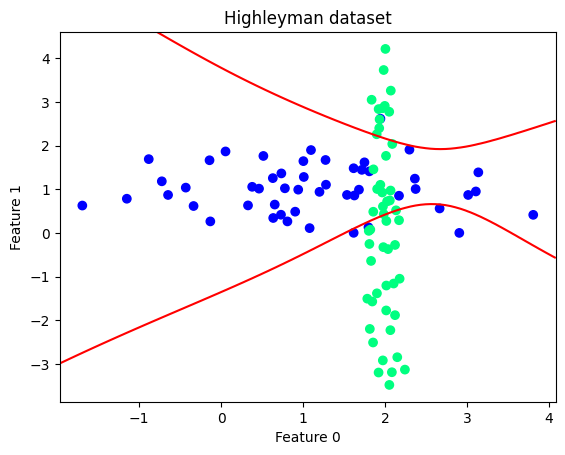

In [32]:
highley_data = pr.gendath()
parzen = pr.parzenc(highley_data)
pr.scatterd(highley_data)
pr.plotc(parzen, levels=[0], colors='r', gridsize=100)    # decision boundary of the classifier (not the true boundary)

# Get the classification rate using testc -> does it correspond to what we see in the plot?
err = pr.testc(parzen.eval(highley_data))
print('Classification/error rate: ', err)

## 1.5: Classification with Normal Densities

<img src="normal-1.png" style="width:600px;"/>
<img src="normal-2.png" style="width:600px;"/>
<img src="normal-3.png" style="width:600px;"/>
<img src="normal-4.png" style="width:600px;"/>

Figure 2.4 shows a negative correlation, whereas all others are zero.


Estimates for a normal distribution:  Gaussian density, 2 to 1 trained mapping


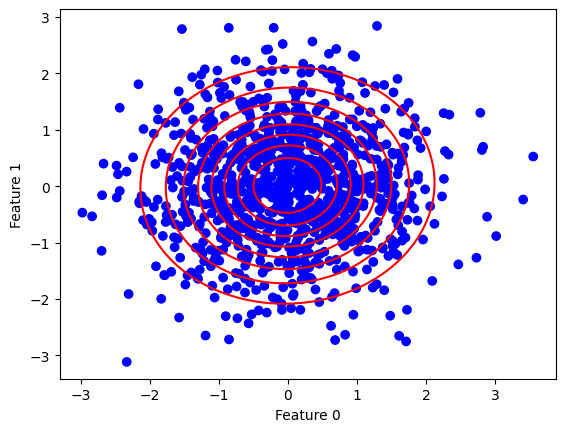

In [35]:
# 1.13: Generate 1000 random points from a 2D standard normal distribution using randn
# Gives matrix of size 1000 x 2
data = np.random.randn(1000, 2)
data = pr.prdataset(data)
pr.scatterd(data)

# Determine estimates for a normal distribution based on the data, stores estimated params in mapping w 
# This mapping may be applied to new dataset
w = pr.gaussm(data)
print('Estimates for a normal distribution: ', w)
pr.plotm(w, nrlevels=10, colors='r', gridsize=100)   # plot the estimates


1.15: Assume two 2D normal distributions with different means but equal covariance matrices (i.e. same variance) -> LDA (could be QDA if correlation is 0).

Shape of class1_samples:  (10, 2)
Estimates for LDA:  LDA, 2 to 2 trained mapping
Estimates for QDA:  QDA, 2 to 2 trained mapping


/var/folders/g5/pq1216cd2x310s210s2jx33w0000gn/T/ipykernel_51930/1797558528.py:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  class1_samples = np.random.multivariate_normal(mean_class1, cov, 10)
/var/folders/g5/pq1216cd2x310s210s2jx33w0000gn/T/ipykernel_51930/1797558528.py:15: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  class2_samples = np.random.multivariate_normal(mean_class2, cov, 10)
/var/folders/g5/pq1216cd2x310s210s2jx33w0000gn/T/ipykernel_51930/1797558528.py:47: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([plotc_ld, plotc_qd], ['LDA', 'QDA'])


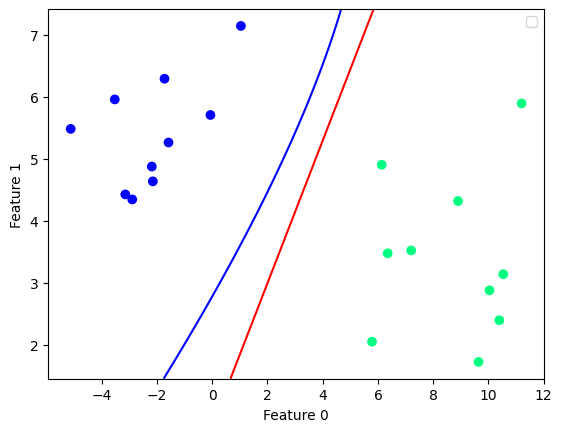

In [26]:
# 1.15: Generate 10 2D data points per class, so 20 data points in total
# The 2 features have different means but the same covariance matrix

# Define the mean for each class
mean_class1 = [-2, 5]
mean_class2 = [8, 3]

# Define the same covariance matrix for both classes (that does not mean all features have the same variance!)
cov = [[5, 2], 
       [3, 3]]

# Generate 10 samples for each class
class1_samples = np.random.multivariate_normal(mean_class1, cov, 10)
print('Shape of class1_samples: ', class1_samples.shape)  # (10,2)
class2_samples = np.random.multivariate_normal(mean_class2, cov, 10)
data = np.concatenate((class1_samples, class2_samples), axis=0)

# Verify by computing mean and std -> equal cov matrix also means equal std for both classes
# NOTE: the stds will only be equal for large enough no. of samples!
mean_1 = np.mean(class1_samples, axis=0) 
mean_2 = np.mean(class2_samples, axis=0) 
std_1 = np.std(class1_samples, axis=0) 
std_2 = np.std(class2_samples, axis=0)
# print('Mean1 = ', mean_1)
# print('Mean2 = ', mean_2)
# print('Std1 = ', std_1)
# print('Std2 = ', std_2)

# Create labels: 10 1s and 10 2s starting with 1s
lab = np.concatenate((np.ones(10), 2*np.ones(10)), axis=0).reshape(20, 1)
a = pr.prdataset(data, lab)
# print('Dataset: \n', a.data)
pr.scatterd(a)

# Estimate LDs and QDs (similar to gaussm above) trained on our normally distributed data
ld = pr.ldc(a)
qd = pr.qdc(a)
print('Estimates for LDA: ', ld)
# pr.plotm(ld, nrlevels=5, colors='r', gridsize=500)   # plot the estimates for LDA
print('Estimates for QDA: ', qd)
# pr.plotm(qd, nrlevels=5, colors='b', gridsize=500)   # plot the estimates for QDA

# Plot decision boundaries using plotc
# For multiple classifiers, use plt.legend()
# NOTE: for infinite samples, QDA and LDA will give the same decision boundary (both linear)! 
plotc_ld = pr.plotc(ld, colors='r', gridsize=500)
plotc_qd = pr.plotc(qd, colors='b', gridsize=500)
plt.legend([plotc_ld, plotc_qd], ['LDA', 'QDA'])


## 1.6: Density Estimation using Parzen Densities

## 1.7: The Scaling Problem